Dylan Hastings

# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def matrix_multiply(A,B):
    '''
    Takes in two matrices and returns their dot product.
    '''
    A_vec = np.array(A)
    B_vec = np.array(B)
    row1, col1 = A_vec.shape
    row2, col2 = B_vec.shape
    dp = np.zeros((row1,col2))
    
    try:
        for i in range(len(A)):
            for j in range(len(B[0])):
                for k in range(len(B)):
                    dp[i,j] += A[i,k] * B[k,j]
                    
    except IndexError:
            print("Columns of A should be equal to rows of B")
    
    return dp

In [4]:
A = np.array([ [1,2,3] ])

In [5]:
B = np.array([ [1], [4], [7] ])

In [6]:
matrix_multiply(A,B)

array([[30.]])

In [7]:
A @ B

array([[30]])

# 2 Matrix Math torture

**2.1** Give a 3 examples of non-invertible square matrices that are non-zero



In [8]:
np.array([[9,6], [12,8]])

array([[ 9,  6],
       [12,  8]])

In [9]:
np.array([[3,3], [5,5]])

array([[3, 3],
       [5, 5]])

In [10]:
A = np.array([[1,6,4], [2,4,-1], [-1,2,5]])
A

array([[ 1,  6,  4],
       [ 2,  4, -1],
       [-1,  2,  5]])

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)



The only matrix that can multiply a matrix A to produce the same matrix A is the Identity matrix I.  Any other matrix multiplied by A will produce a matrix that is different from A.  For example, if we use the matrix_multiply function from Q1, and define B to be the Identity matrix:

In [11]:
B = np.array([[1,0,0], [0,1,0], [0,0,1]])

In [12]:
AB = matrix_multiply(A,B)
AB

array([[ 1.,  6.,  4.],
       [ 2.,  4., -1.],
       [-1.,  2.,  5.]])

The result of the matrix_multiply function is A itself.

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.



In [13]:
B = np.array([[1,1,1], [2,2,2], [3,3,3]])

In [14]:
C = np.array([[1,2,3], [4,5,6], [7,8,9]])

In [15]:
AB = matrix_multiply(A,B)

In [16]:
ABC = matrix_multiply(AB,C)
ABC

array([[300., 375., 450.],
       [ 84., 105., 126.],
       [216., 270., 324.]])

In [17]:
ABC.trace()

729.0

In [18]:
CB = matrix_multiply(C,B)
CB

array([[14., 14., 14.],
       [32., 32., 32.],
       [50., 50., 50.]])

In [19]:
CBA = matrix_multiply(CB,A)
CBA

array([[ 28., 168., 112.],
       [ 64., 384., 256.],
       [100., 600., 400.]])

In [20]:
CBA.trace()

812.0

In [21]:
ABC.trace() == CBA.trace()

False

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)



In [22]:
D = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0],[0,0,0,0]])
D

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0]])

In [23]:
A =  np.array([[2,2,4,2], [2,2,4,4], [4,2,4,4],[2,4,2,2]])
A

array([[2, 2, 4, 2],
       [2, 2, 4, 4],
       [4, 2, 4, 4],
       [2, 4, 2, 2]])

In [24]:
I = np.linalg.inv(A)
I

array([[ 0.        , -0.5       ,  0.5       ,  0.        ],
       [ 0.        ,  0.        , -0.16666667,  0.33333333],
       [ 0.5       ,  0.        , -0.16666667, -0.16666667],
       [-0.5       ,  0.5       ,  0.        ,  0.        ]])

In [25]:
ID = matrix_multiply(I,D)
ID

array([[ 0.        , -0.5       ,  0.5       ,  0.        ],
       [ 0.        ,  0.        , -0.16666667,  0.        ],
       [ 0.5       ,  0.        , -0.16666667,  0.        ],
       [-0.5       ,  0.5       ,  0.        ,  0.        ]])

In [26]:
IDA = matrix_multiply(ID,A)
IDA

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [-0.66666667, -0.33333333, -0.66666667, -0.66666667],
       [ 0.33333333,  0.66666667,  1.33333333,  0.33333333],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [27]:
Q = matrix_multiply(IDA,IDA)
Q

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [-0.66666667, -0.33333333, -0.66666667, -0.66666667],
       [ 0.33333333,  0.66666667,  1.33333333,  0.33333333],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

Q is thus an idempotent matrix.

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

In [28]:
A = np.array([[1,1,1], [0,2,5], [2,5,-1]])
A

array([[ 1,  1,  1],
       [ 0,  2,  5],
       [ 2,  5, -1]])

In [29]:
B = np.array([ [6], [-4], [27] ])
B

array([[ 6],
       [-4],
       [27]])

In [30]:
np.linalg.solve(A,B)

array([[ 5.],
       [ 3.],
       [-2.]])

# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [31]:
import pandas as pd
from sklearn.datasets import load_boston
import statsmodels.api as sm

boston = pd.DataFrame(load_boston().data,columns = load_boston().feature_names )
y = load_boston().target

X = sm.add_constant(boston)
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        09:05:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.2 Polynomial features

Use polynomial features to improve your regression model in `2.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [32]:
X = X.drop(columns=['INDUS', 'AGE'])
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          5.54e-137
Time:                        09:05:25   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X['NOX2'] = X.NOX ** 2
X['NOX3'] = X.NOX ** 3
X['RM2'] = X.RM ** 2
X['DIS2'] = X.DIS ** 2
X['DIS3'] = X.DIS ** 3
X['TAX2'] = X.TAX ** 2
X['TAX3'] = X.TAX ** 3
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     121.5
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          5.83e-167
Time:                        09:05:25   Log-Likelihood:                -1409.4
No. Observations:                 506   AIC:                             2857.
Df Residuals:                     487   BIC:                             2937.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.4416     31.368      2.373      0.018      12.807     136.076
CRIM          -0.1547      0.029     -5.388      0.000      -0.211      -0.098
ZN             0.0318      0.014      2.314      0.021       0.005       0.059
CHAS           2.5857      0.728      3.550      0.000       1.154       4.017
NOX          436.7934    147.255      2.966      0.003     147.459     726.128
RM           -26.9324      2.626    -10.257      0.000     -32.092     -21.773
DIS           -5.8009      1.290     -4.497      0.000      -8.335      -3.266
RAD            0.2165      0.067      3.209      0.001       0.084       0.349
TAX           -0.2201      0.062     -3.558      0.000      -0.342      -0.099
PTRATIO       -0.7952      0.116     -6.859      0.000      -1.023      -0.567
B              0.0070      0.002      3.090      0.002       0.003       0.012
LSTAT         -0.5637      0.041    -13.871      0.000      -0.644      -0.484
NOX2        -736.8460    239.951     -3.071      0.002   -1208.313    -265.380
NOX3         382.0207    126.902      3.010      0.003     132.677     631.364
RM2            2.4038      0.203     11.866      0.000       2.006       2.802
DIS2           0.8009      0.233      3.432      0.001       0.342       1.259
DIS3          -0.0378      0.013     -2.914      0.004      -0.063      -0.012
TAX2           0.0005      0.000      3.246      0.001       0.000       0.001
TAX3       -3.766e-07   1.21e-07     -3.100      0.002   -6.15e-07   -1.38e-07
==============================================================================
Omnibus:                      142.228   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2529.684
Skew:                           0.721   Prob(JB):                         0.00
Kurtosis:                      13.858   Cond. No.                     2.77e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

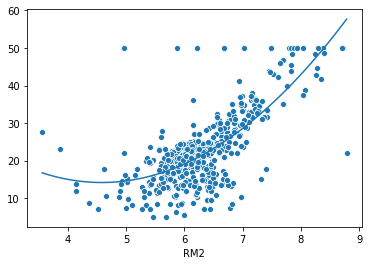

In [129]:
x = X['RM']
r_min, r_max = X.RM.min(), X.RM.max()
coefficients = np.polyfit(x, y, 2)
sns.scatterplot(x, y)
xfit = np.linspace(r_min, r_max, 100)
yfit = np.polyval(coefficients, xfit)
g = sns.lineplot(xfit, yfit)
g.set_xlabel('RM2')
plt.show()

# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **2.4** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

In [130]:
def reg_plot_on_ax(feature, ax, degree):
    '''
    This function plot the input feature with the house price as the response variable.
    '''
    r_min, r_max = feature.min(), feature.max()
    coefficients = np.polyfit(feature, y, degree)
    sns.scatterplot(feature, y, ax=ax, legend = False)
    ax.set_xlabel(feature.name + str(degree))
    xfit = np.linspace(r_min, r_max, 100)
    yfit = np.polyval(coefficients, xfit)
    sns.lineplot(xfit, yfit, ax=ax)

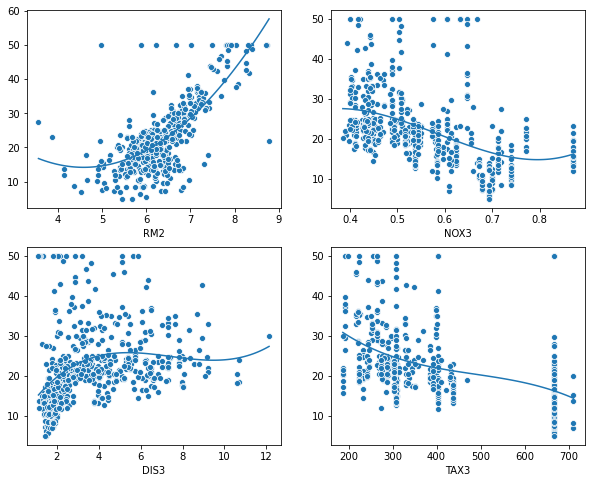

In [131]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
reg_plot_on_ax(X['RM'], ax1, 2)
reg_plot_on_ax(X['NOX'], ax2, 3)
reg_plot_on_ax(X['DIS'], ax3, 3)
reg_plot_on_ax(X['TAX'], ax4, 3)